In [121]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [122]:
#acquire the data

# Load data
data = pd.read_csv('listings.csv',sep=',')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9147025,https://www.airbnb.com/rooms/9147025,20160601225828,2016-06-02,Cozy City Island Cottage,City Island is a small community at the edge o...,This cozy little cottage is an open floor plan...,City Island is a small community at the edge o...,none,City Island is famous for it's seafood restaur...,NaN,City Island is a walkable Island. Everything i...,This is a whole private house on a charming qu...,I live close by and know the area well if you ...,No Smoking,https://a2.muscache.com/im/pictures/4e308401-5...,https://a2.muscache.com/im/pictures/4e308401-5...,https://a2.muscache.com/im/pictures/4e308401-5...,https://a2.muscache.com/im/pictures/4e308401-5...,403032,https://www.airbnb.com/users/show/403032,Diane,2011-02-21,"New York, New York, United States",NaN,within a few hours,100%,80%,f,https://a2.muscache.com/im/pictures/dc275952-e...,https://a2.muscache.com/im/pictures/dc275952-e...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",...,$95.00,$550.00,NaN,$500.00,$30.00,1,$0.00,1,1125,6 weeks ago,NaN,1,25,25,208,2016-06-02,9,2015-12-26,2016-04-24,91.0,9.0,9.0,9.0,9.0,10.0,9.0,f,NaN,NaN,f,moderate,f,f,1,1.69
1,6627449,https://www.airbnb.com/rooms/6627449,20160601225828,2016-06-02,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,There is off street parking in the apartment c...,We are (2) blocks from the BX29 bus which you ...,The entire apartment is available as I am only...,My daughter and her family live on the Island ...,There is no smoking and no pets. Otherwise us...,https://a0.muscache.com/im/pictures/83539171/1...,https://a0.muscache.com/im/pictures/83539171/1...,https://a0.muscache.com/im/pictures/83539171/1...,https://a0.muscache.com/im/pictures/83539171/1...,13886510,https://www.airbnb.com/users/show/13886510,Arlene,2014-04-04,"Los Angeles, California, United States",NaN,within a few hours,100%,100%,f,https://a1.muscache.com/im/users/13886510/prof...,https://a1.muscache.com/im/users/13886510/prof...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",...,$125.00,$775.00,NaN,NaN,$75.00,1,$0.00,3,21,3 months ago,NaN,25,55,73,348,2016-06-02,9,2015-07-04,2016-05-06,91.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,flexible,f,f,1,0.81
2,11675715,https://www.airbnb.com/rooms/11675715,20160601225828,2016-06-02,Cozy 1 BR Basement Apartment,"City Island is an active, year-round nautical ...",This very cozy apartment with features a queen...,"City Island is an active, year-round nautical ...",none,City Island is a small island and a neighborho...,"You have access to all Basic Cable Channels, S...",The easiest way to get to Manhattan quickly is...,The entire apartment is available. You are wel...,"I live in the vicinity and know the ar

In [123]:
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 999)

In [124]:
def wrangler(data):
    data = data.drop(["last_scraped", "listing_url", "summary","neighborhood_overview","space","description","license","jurisdiction_names",\
                      "has_availability","scrape_id","name","summary","space","description","experiences_offered",\
                      "neighborhood_overview","city", "security_deposit", "weekly_price", "monthly_price", "cleaning_fee", \
"notes","transit","access","interaction","house_rules","thumbnail_url","medium_url","picture_url","xl_picture_url",\
"host_url","host_name","host_location","host_about","host_response_time","host_thumbnail_url","host_picture_url",\
"host_neighbourhood","host_verifications","street","neighbourhood","square_feet","calendar_updated","calendar_last_scraped",\
"requires_license","license","state","jurisdiction_names","require_guest_profile_picture","require_guest_phone_verification"], axis=1)
    return data

In [125]:
data = wrangler(data)

In [126]:
data.head()

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,9147025,403032,2011-02-21,100%,80%,f,1.0,1.0,t,f,City Island,Bronx,10464,New York,"Bronx, NY",US,United States,40.844870,-73.789541,f,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",$95.00,1,$0.00,1,1125,1,25,25,208,9,2015-12-26,2016-04-24,91.0,9.0,9.0,9.0,9.0,10.0,9.0,f,moderate,1,1.69
1,6627449,13886510,2014-04-04,100%,100%,f,1.0,1.0,t,t,City Island,Bronx,10464,New York,"City Island, NY",US,United States,40.849775,-73.786609,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",$125.00,1,$0.00,3,21,25,55,73,348,9,2015-07-04,2016-05-06,91.0,10.0,10.0,10.0,10.0,10.0,9.0,f,flexible,1,0.81
2,11675715,56714504,2016-01-30,100%,100%,f,1.0,1.0,t,t,City Island,Bronx,10464,New York,"City Island, NY",US,United States,40.850376,-73.784681,t,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$79.00,2,$10.00,1,1125,1,1,11,282,11,2016-03-21,2016-05-18,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,flexible,1,4.46
3,8053533,42532507,2015-08-25,67%,100%,f,1.0,1.0,t,t,City Island,Bronx,10464,New York,"Bronx, NY",US,United States,40.848202,-73.789293,f,Condominium,Entire home/apt,5,2.5,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$179.00,1,$30.00,3,1125,0,0,0,271,5,2015-10-10,2016-04-13,100.0,10.0,9.0,10.0,10.0,10.0,10.0,t,flexible,1,0.63
4,1886820,9815788,2013-11-04,NaN,NaN,f,1.0,1.0,t,f,City Island,Bronx,10464,New York,"Bronx, NY",US,United States,40.841144,-73.783052,t,House,Entire home/apt,4,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$300.00,4,$25.00,7,90,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,1,NaN


In [127]:
data.columns

Index([u'id', u'host_id', u'host_since', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_listings_count',
       u'host_total_listings_count', u'host_has_profile_pic',
       u'host_identity_verified', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'zipcode', u'market',
       u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommodates', u'bathrooms', u'bedrooms', u'beds', u'bed_type',
       u'amenities', u'price', u'guests_included', u'extra_people',
       u'minimum_nights', u'maximum_nights', u'availability_30',
       u'availability_60', u'availability_90', u'availability_365',
       u'number_of_reviews', u'first_review', u'last_review',
       u'review_scores_rating', u'review_scores_accuracy',
       u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
     

In [128]:
data.dtypes

id                                  int64
host_id                             int64
host_since                         object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
zipcode                            object
market                             object
smart_location                     object
country_code                       object
country                            object
latitude                          float64
longitude                         float64
is_location_exact                  object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         

In [129]:
# Processing property_type
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
u = sorted(set(data['property_type']))

# Create dictionary mapping each unique value to a numeric value
property_type_dict = {}
for v, k in enumerate(u):
    property_type_dict[k] = v

# Replace using dictionary
data = data.replace({'property_type': property_type_dict})

In [130]:
# Set features to use
features = ['minimum_nights', 'maximum_nights', 'availability_30', 'number_of_reviews',\
            'property_type', 'availability_60', 'accommodates', 'guests_included', 'availability_90', 'review_scores_rating',\
           'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',\
           'review_scores_location', 'review_scores_value','calculated_host_listings_count', 'reviews_per_month']

# Set target variable name
target = ['host_is_superhost']

In [131]:
data2 = data[features+target]

In [132]:
data2 = data2.dropna()

In [133]:
di = {"t": 1, "f": 0}

data2 = data2.replace({"host_is_superhost": di})

data2['host_is_superhost'] = data2['host_is_superhost'].astype(int)

In [134]:
#price, extra_people, availability_30, minimum_nights, number_of_reviews, review_scores_rating

In [135]:
from sklearn import ensemble



# Set X and y
X = data2[features]
y = data2[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=10, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

/Users/DiegoR/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.993
Accuracy: 0.940


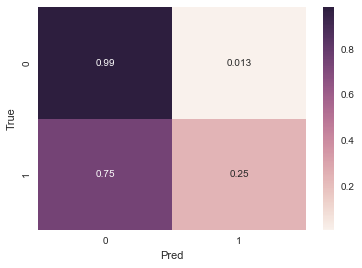

Confusion Matrix:
[[9849  128]
 [ 510  167]]


In [137]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

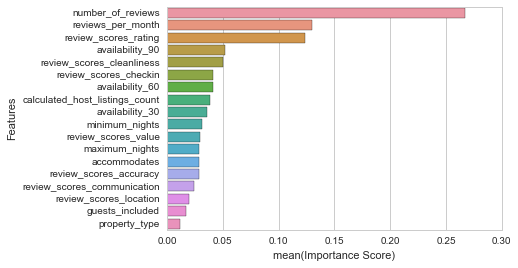

In [138]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [139]:
print "DONE"

DONE


In [140]:
data.number_of_reviews.dtype

dtype('int64')